# <b>Overview</b>

<h1><b>Health Care Prediction on Diabetic Patients using Python - The Case Study</h1></b>

<hr><br>

<h2><b>Introduction</b></h2>

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. Its primary objective is to diagnostically predict whether a patient has diabetes or not based on specific diagnostic measurements. The dataset was carefully selected, focusing on female patients aged at least 21 years and of Pima Indian heritage.

This Case Study is a part of 4-week project-based Internship organized by Edunet Foundation in collaboration with AICTE and Shell, focusing on Green Skills using AI technologies.

<br>
<h2><b>Problem Statement</b></h2>

Build a model with high accuracy to predict whether patients in the dataset have diabetes.

<br>
<h2><b>Dataset Description</b></h2>

The dataset includes various medical predictor variables and one target variable, "Outcome."
Predictor variables consists of various health metrics:
  - Number of Pregnancies
  - Plasma glucose concentration
  - Diastolic blood pressure
  - Triceps skinfold thickness
  - Insulin levels
  - Body Mass Index (BMI)
  - Diabetes pedigree function
  - Age

<br>
<h2><b>Predictor Variables</b></h2>

1.  **Pregnancies:** Number of times one is pregnant

2.  **Glucose:** Plasma glucose concentration at 2 hours in an oral glucose tolerance test.

3.  **BloodPressure:** Diastolic blood pressure (mmHg)

4.  **SkinThickness:** Triceps skinfold thickness (mm)

5.  **Insulin:** 2-Hour serum insulin (mu U/ml)

6.  **BMI:** Body mass index as per the formula weight (kg) per square of height (m)

7.  **DiabetesPedigreeFunction:** Diabetes pedigree function

8.  **Age:** Age (years)

<br>
<h2><b>Target Variable</b></h2>

**Outcome:** The Class variable is either 0 or 1. In the dataset, there are 268 instances labeled as 1 (indicating diabetes), while others are labeled as 0.

<br><hr><br>

This dataset provides is a valuable opportunity to develop a predictive model for diabetes based on demographic and health-related features.



# <b>Program</b>

In [ ]:
# @title <b>Importing Library Packages</b>
#!pip install dask

import numpy as np
import pandas as pd
import itertools as its
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as knn
from tabulate import tabulate as tb
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc,f1_score,roc_auc_score


print("All packages has been imported successfully.")

All packages has been imported successfully.


In [ ]:
# @title <b>Glimpse of Healthcare Dataset for Diabetes</b>

data = pd.read_csv(r'/content/Healthcare-Diabetes.csv')
data

#data.head() --> Displays Top 5 rows of dataset
#data.tail() --> Displays Bottom 5 rows of dataset

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title <b>Structure of Healthcare Dataset</b>

# Number of Rows and Columns in given Dataset
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns.\n\n")

# Dataset Structure Overview
data.info()

# Statistics Summary for the Dataset
print("\n\nStatistical Summary of all the Variables")
print(tb(data.describe().apply(lambda x: round(x, 3)), headers = 'keys', tablefmt = 'psql'))

The dataset contains 2768 rows and 10 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Statistical Summary of all the Variables
+-------+----------+---------------+-----------+-----------------+-----------------+-----

## <b>Data Preprocessing : Data Completion</b>

In the datasets 0 represents the NULL values for some variables, and hence we will replace 0 by mean of their columns.

In [ ]:
# @title <b>Mean of Variables</b>

#Identifying the mean of the various features
print("Mean Value of Glucose Level is \t:",round(data['Glucose'].mean(),3))
print("Mean Value of Blood Pressure is :",round(data['BloodPressure'].mean(),3))
print("Mean Value of Skin Thickness is :",round(data['SkinThickness'].mean(),3))
print("Mean Value of Insulin Level is \t:",round(data['Insulin'].mean(),3))

Mean Value of Glucose Level is 	: 121.103
Mean Value of Blood Pressure is : 69.134
Mean Value of Skin Thickness is : 20.824
Mean Value of Insulin Level is 	: 80.128


In [ ]:
# @title <b>NULL Value Percentage Analysis</b>

# Finding the number of rows which has 0 in various features indicating NULL values
print("NULL Values proportion in dataset for different Variables : ")
print('Glucose\t\t-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure\t-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness\t-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin\t\t-',len(data['Insulin'][data['Insulin']==0]))

# NULL Value Percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = round((data[selected_columns] == 0).mean() * 100,2)

# Displaying NULL Value Percentage
print("\nPercentage of NULL Values for each column :")
print(null_percentage)

NULL Values proportion in dataset for different Variables : 
Glucose		- 18
BloodPressure	- 125
SkinThickness	- 800
Insulin		- 1330

Percentage of NULL Values for each column :
Glucose           0.65
BloodPressure     4.52
SkinThickness    28.90
Insulin          48.05
dtype: float64


<h3><b>Inferences from Null Value Percentage Analysis</b></h3>

The analysis of NULL value percentages in the dataset reveals the following insights:

1. **Glucose:** Approximately 0.65% of data points in the "Glucose" column are represented as NULL values.

2. **Blood Pressure:** The "Blood Pressure" column has a NULL value percentage of approximately 4.56%.

3. **Skin Thickness:** A significant portion of the "Skin Thickness" column, around 29.56%, contains NULL values.

4. **Insulin:** The "Insulin" column exhibits a higher NULL value percentage, with approximately 48.70% of the data points being NULL.

These findings suggest that imputation or other strategies may be necessary for columns with substantial NULL values, such as "Skin Thickness" and "Insulin," to ensure the integrity of the dataset for subsequent analyses or modeling.

In [ ]:
# @title <b>NULL Value Treatment</b>

# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of NULL Values for Each Column after NULL Value Treatment:")
print(null_percentage_treated)

Percentage of NULL Values for Each Column after NULL Value Treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


###<b>Inference from NULL Value Treatment</b>

After addressing NULL values in the dataset, it is observed that all selected columns (Glucose, Blood Pressure, Skin Thickness, and Insulin) no longer contain any NULL values. The NULL value treatment has been successful, resulting in a clean dataset with 0% NULL values in these specific columns.

## <b>Data Preprocessing : Data Noise Reduction</b>

In the dataset outliers are detected and removed by statistical methods of IQR to leverage ML algorithms for anomaly detection.

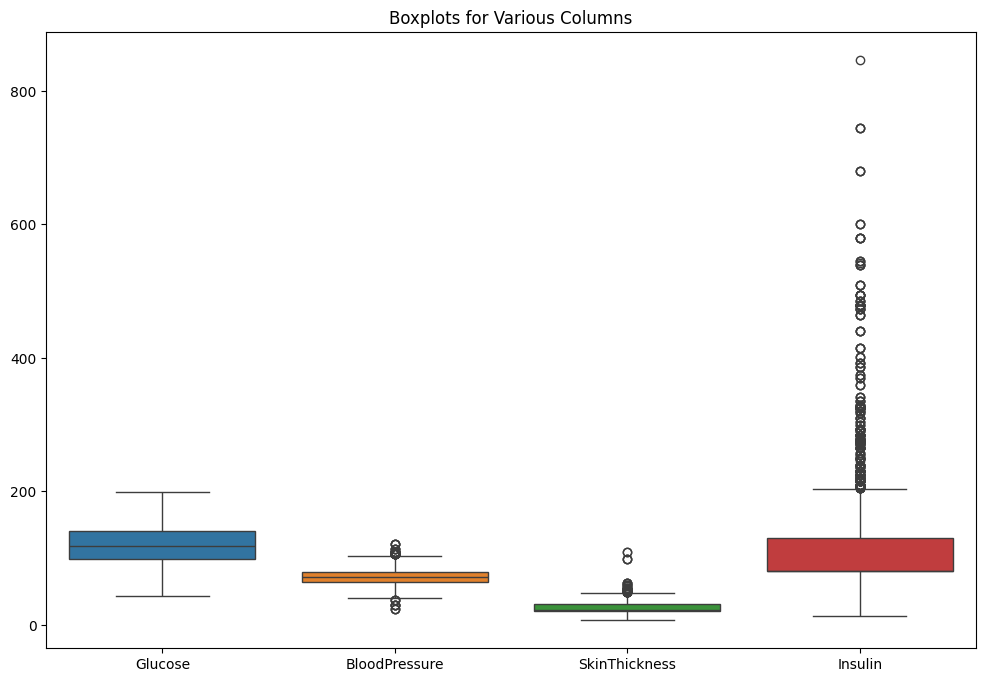

In [ ]:
# @title <b>Boxplot Analysis</b>

columns=data[selected_columns]

# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Various Columns")
plt.show()

In [ ]:
# @title <b>Outliers Detection</b>

# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find Outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    # Count the number of outliers
    count_outliers = len(outliers)
    return count_outliers

# Calculate and print the number of outliers for each column of interest
print("Number of outliers in various columns :")
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"{column_name} \t - {outlier_count}")

Number of outliers in various columns :
Glucose 	 - 0
BloodPressure 	 - 49
SkinThickness 	 - 58
Insulin 	 - 304


In [ ]:
# @title <b>Finding IQR</b>

sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print("IQR for various data fields:")
print(IQR)

IQR for various data fields:
Id                          1660.200000
Pregnancies                    6.000000
Glucose                       52.000000
BloodPressure                 20.000000
SkinThickness                 14.175578
Insulin                       74.872110
BMI                           12.000000
DiabetesPedigreeFunction       0.466000
Age                           19.000000
Outcome                        1.000000
dtype: float64


In [ ]:
# @title <b>Cleaning Data : Outlier Treatment</b>

clean_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data cleaning done successfully.\n")
rows, cols = clean_data.shape
print("The dataset cleaned by IQR method contains",rows,"rows and",cols,"columns while", end =" ")
rows, cols = data.shape
print("the original dataset contains",rows,"rows and",cols,"columns.")

Data cleaning done successfully.

The dataset cleaned by IQR method contains 2453 rows and 10 columns while the original dataset contains 2768 rows and 10 columns.


In [ ]:
# @title <b>Data after Cleaning</b>
print("Data after Cleaning\n")
clean_data

Data after Cleaning



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.0,72.0,35.000000,80.12789,33.6,0.627,50,1
1,2,1,85.0,66.0,29.000000,80.12789,26.6,0.351,31,0
2,3,8,183.0,64.0,20.824422,80.12789,23.3,0.672,32,1
3,4,1,89.0,66.0,23.000000,94.00000,28.1,0.167,21,0
5,6,5,116.0,74.0,20.824422,80.12789,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
2762,2763,1,79.0,60.0,42.000000,48.00000,43.5,0.678,23,0
2763,2764,2,75.0,64.0,24.000000,55.00000,29.7,0.370,33,0
2764,2765,8,179.0,72.0,42.000000,130.00000,32.7,0.719,36,1
2765,2766,6,85.0,78.0,20.824422,80.12789,31.2,0.382,42,0


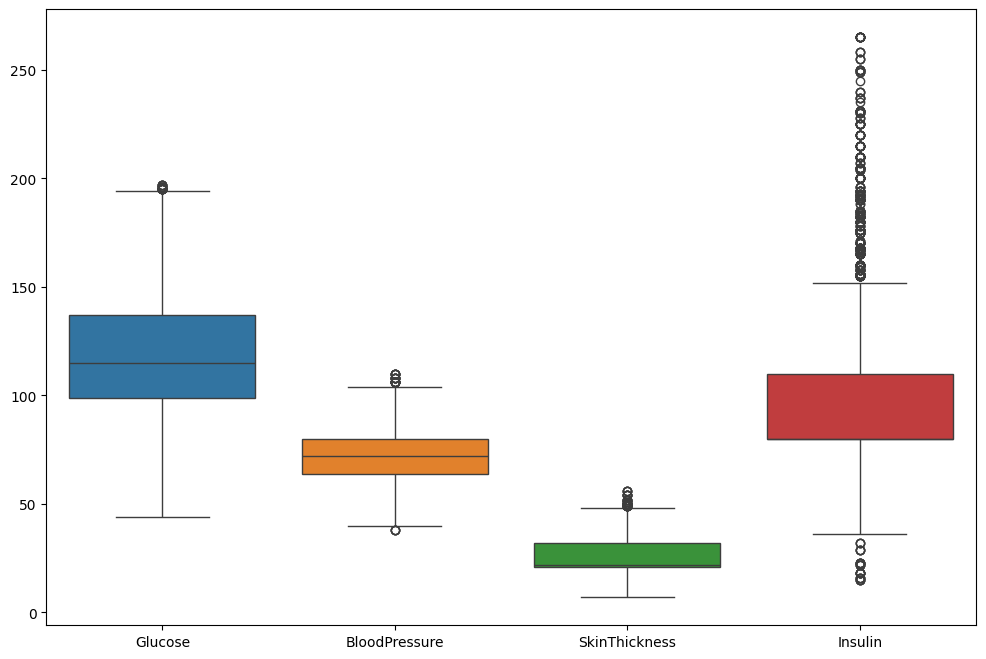

In [ ]:
# @title <b>Boxplot Analysis of Cleaned Data</b>

col=clean_data[['Glucose','BloodPressure','SkinThickness','Insulin']]

# Checking the outliers after treatment using box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

###<b>Inference from Outlier Treatment using IQR Method</b>

1. **Data Size Reduction:** After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 768 to 678 rows.

2. **Outliers Identified:** Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood Pressure, Skin Thickness and Insulin.

3. **Increased Data Robustness:** The IQR-based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analyses and modeling.

4. **Preserved Features:** The operation was applied to 9 columns, including predictors like Glucose and Skin Thickness, as well as the target variable Outcome.

5. **Consideration for Domain Knowledge:** The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.

**Final Dataset Statistics:**
- Dataset size after outlier removal: 678 rows.
- Original dataset size: 768 rows.

## <b>Exploratory Data Analysis : Univariate Analysis</b>

It is a statistical method that examines each variable in a data set separately.

###<b>Histograms</b>

Qualitative analysis is done for categorical data, to analyze summarized data by counting the number of observations in each category to visualize the distribution of categorical data.

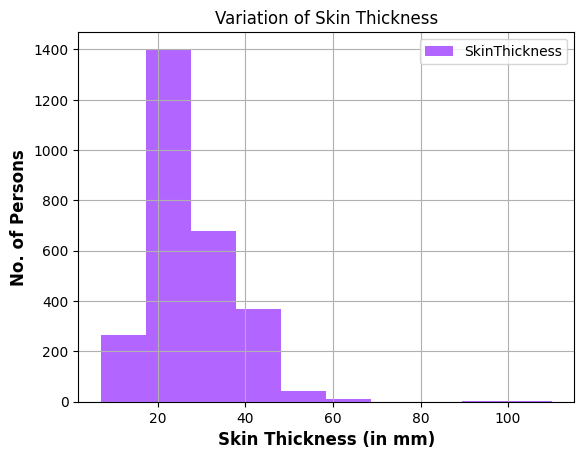

In [ ]:
# @title <b>Analysis of SkinThickness</b>

st = data['SkinThickness'].plot(kind='hist', bins=10, title='Variation of Skin Thickness', grid = True, color = "#B266FF")
st.set_xlabel('Skin Thickness (in mm)',fontsize=12, fontweight='bold')
st.set_ylabel('No. of Persons',fontsize=12, fontweight='bold')
plt.legend()
plt.show()

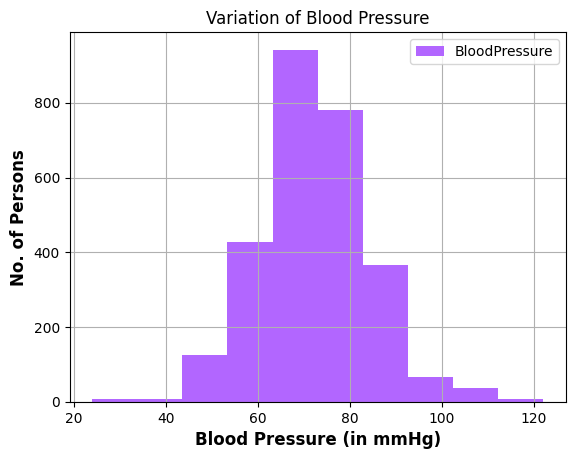

In [ ]:
# @title <b>Analysis of BloodPressure</b>

st = data['BloodPressure'].plot(kind='hist', bins=10, title='Variation of Blood Pressure', grid = True, color = "#B266FF")
st.set_xlabel('Blood Pressure (in mmHg)',fontsize=12, fontweight='bold')
st.set_ylabel('No. of Persons',fontsize=12, fontweight='bold')
plt.legend()
plt.show()

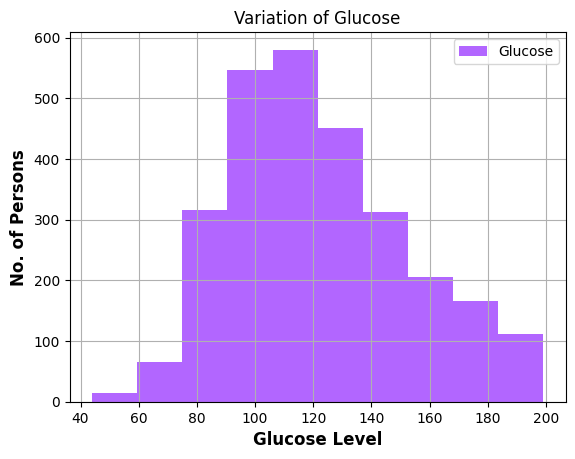

In [ ]:
# @title <b>Analysis of Glucose</b>

st = data['Glucose'].plot(kind='hist', bins=10, title='Variation of Glucose', grid = True, color = "#B266FF")
st.set_xlabel('Glucose Level',fontsize=12, fontweight='bold')
st.set_ylabel('No. of Persons',fontsize=12, fontweight='bold')
plt.legend()
plt.show()

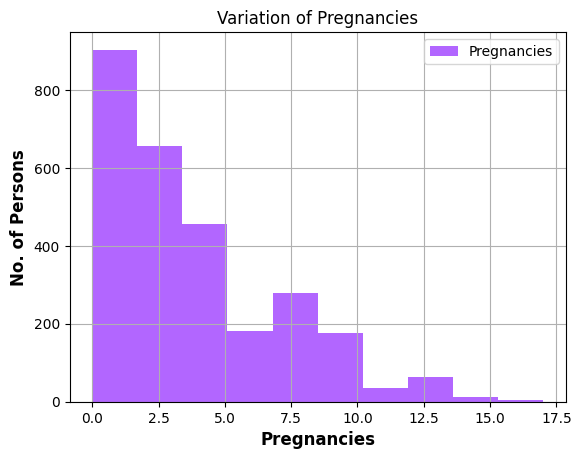

In [ ]:
# @title <b>Analysis of Pregnancies</b>

st = data['Pregnancies'].plot(kind='hist', bins=10, title='Variation of Pregnancies', grid = True, color = "#B266FF")
st.set_xlabel('Pregnancies',fontsize=12, fontweight='bold')
st.set_ylabel('No. of Persons',fontsize=12, fontweight='bold')
plt.legend()
plt.show()

###<b>Kernel Density Estimation (KDE)</b>

KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.

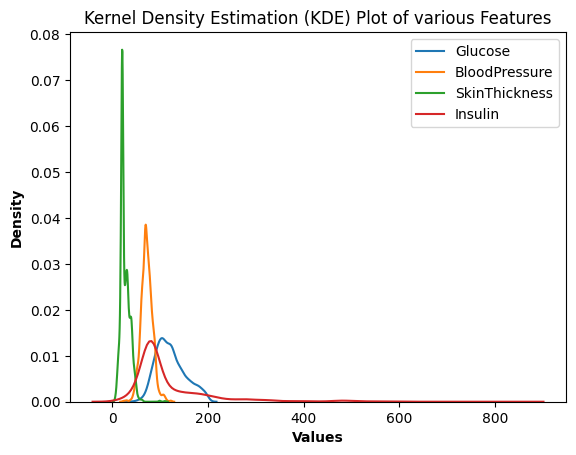

In [ ]:
# @title <b>Analysis of Features by Kernel Density Estimation (KDE)</b>

# Kernel Density Estimation (KDE) plot for the selected features
for column in selected_columns:
    sns.kdeplot(data[column], label = column)
plt.title("Kernel Density Estimation (KDE) Plot of various Features")
plt.xlabel('Values',fontsize=10, fontweight='bold')
plt.ylabel('Density',fontsize=10, fontweight='bold')
plt.legend()
plt.show()

###<b>Violin Plot</b>

The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers. It represents the KDE + Box Plot feature.

In [ ]:
# @title <b>Analysis of Features by Violin Plot</b>

sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of various Features")
plt.xlabel('Features',fontsize=10, fontweight='bold')
plt.ylabel('Values',fontsize=10, fontweight='bold')
plt.show()

###<b>Analyzing Data Types</b>

To create a count (frequency) plot describing the data types of variables and their count. To analyze the various data types used in the dataset.

In [ ]:
# @title <b>Descibing Datatypes of various Features</b>

print("Data types of various predictor variables in the dataset is :")
print(data.dtypes)
data.dtypes

type_data = data.dtypes.value_counts()
print("\nFrequecy of various Datatypes in dataset is :")
print(type_data,"\n\n")

type_data.plot(kind='bar', title='Count of Data Types', color = "#2ECC71")
plt.xlabel('Data Types',fontsize=10, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.show()


It can be observed that there are 3 features of integer data type and 6 features of float data type.

###<b>Numeric and Categorical Variables</b>

Numeric variables represent quantitative data and can be continuous or discrete. Categorical variables represent qualitative data and are either nominal (no order) or ordinal (ordered). Numeric data involves mathematical operations, while categorical data classifies or ranks characteristics without inherent numerical value.

In [ ]:
# @title <b>Detecting Numeric and Categorical Variables</b>

cat_th=10
car_th=20

cat_data = [col for col in data.columns if data[col].dtypes == "O"]

num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and
                   data[col].dtypes != "O"]

cat_but_car = [col for col in data.columns if data[col].nunique() > car_th and
                   data[col].dtypes == "O"]

cat_data +=  num_but_cat

cat_data = [col for col in cat_data if col not in cat_but_car]

num_cols = [col for col in data.columns if data[col].dtypes != "O"]

num_cols = [col for col in num_cols if col not in num_but_cat]

print(f"Observations\t\t\t\t: {data.shape[0]}")
print(f"Variables\t\t\t\t: {data.shape[1]}"," -> ",list(data.columns))
print(f'Categorical Variables\t\t\t: {len(cat_data)}'," -> ",cat_data)
print(f'Numerical Variables\t\t\t: {len(num_cols)}'," -> ",num_cols)
print(f'Cardinal with Categorical Appearance\t: {len(cat_but_car)}'," -> ",cat_but_car)
print(f'Numerical and Categorical Variables\t: {len(num_but_cat)}'," -> ",num_but_cat)

In [ ]:
# @title <b>Analysis of Categorical Variables</b>

print(pd.DataFrame({"Count": data[cat_data[0]].value_counts(),"Ratio": 100 * data[cat_data[0]].value_counts() / len(data)}),"\n\n")
sns.countplot(x=data[cat_data[0]], data=data)
plt.show(block=True)

## <b>Exploratory Data Analysis : Bivariate Analysis</b>

It is a statistical method used to analyze the relationship between two variables. It helps in identifying and summarizing the strength, direction, and nature of the association between them.

###<b>Scatter Plots</b>

It shows relationships between two numerical variables. Each point represents an observation, revealing trends, correlations, or randomness in their distribution and interaction.

In [ ]:
# @title <b>Analyzing Variables in Pairs</b>

# Create combinations of binary categorical variables
feature_combinations = list(its.combinations(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 2))

# Create a separate Scatter Chart for each binary categorical variable
for i, (feature1, feature2) in enumerate(feature_combinations):
    sns.scatterplot(data = data, x=feature1, y=feature2, hue='Outcome')
    plt.title(f'{feature1} vs {feature2} Scatter Chart')
    plt.show()
    print("\n\n")

####<b>Inference from Scatter Plots</b>

- In scatter plot, that there is ouliers present in this data.
- Outliers in our data is skewed to left or right side, which is not acceptable.
- This poses a problem to train a model.

###<b>Pair Plot</b>

It visualizes relationships between multiple numerical variables using scatter plots for pairwise comparisons and histograms/diagonal plots to show individual variable distributions.

In [ ]:
# @title <b>Analyzing Pair Plots</b>

sns.pairplot(data= data,  hue='Outcome', height=5)
plt.suptitle("Pairplot of Numeric Features", size=15)
plt.show()

## <b>Exploratory Data Analysis : Multivariate Analysis</b>

It examines relationships among three or more variables simultaneously, identifying patterns, correlations, or dependencies to understand complex data interactions and uncover hidden insights or trends.

In [ ]:
# @title <b>Correlation Analysis</b>

corr = data[num_cols].corr()
corr

In [ ]:
# @title <b>Heat Maps</b>

corr_values = corr.round(2)
sns.heatmap(corr, annot=corr_values)
plt.show()

We can see that outcome has maximum relation with Glucose and minimum with Blood Presure than the other features.

## <b>Data Exploration : Data Imbalance</b>

It  occurs when class distributions in a dataset are uneven, potentially biasing models toward majority classes, impacting performance, especially in classification tasks.

In [ ]:
# @title <b>Analyzing Outcome Variable</b>

print("Count and Percentage of the Outcome Variable\n")

print(pd.DataFrame({"Count": data[cat_data[0]].value_counts(),"Percentage": 100 * data[cat_data[0]].value_counts() / len(data)}),"\n\n")
sns.countplot(x=data[cat_data[0]], data=data)
plt.title('Data - Outcome')
plt.show(block=True)

In [ ]:
# @title <b>Distribution of Outcome Variable</b>

# Calculate the counts of each outcome
outcome_counts = data['Outcome'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]})',
          f'1 - Diabetic\n({outcome_counts[1]})']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.title('Distribution of the Outcome Variable')
plt.show()

<b>Inferences from Outcome Distribution</b>


1. **Class Imbalance:** The dataset exhibits class imbalance in the 'Outcome' variable. Class 0 (No Diabetes) has 500 instances. Class 1 (Diabetes) has 268 instances.

2. **Potential Impact on Modeling:** Class imbalances may affect the performance of ML models, particularly for binary classification tasks. Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics may be necessary.

3. **Consideration for Predictive Models:** Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class.

In [ ]:
# @title <b>Balancing Outcome Variable</b>

outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
print("Balanced Data\n")
balanced_data=100-outcome
print(balanced_data,"\n\n")

balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced Data - Outcome')
plt.show()

## <b>Data Modelling</b>

It transforms raw data into meaningful inputs for models by creating, selecting, or modifying features, enhancing predictive power and improving machine learning model performance.

In [ ]:
# @title <b>Preparing Data for Modelling</b>
# Data Preparation for Modeling
x=data.drop(['Outcome'],axis=1)
y=data.Outcome

# Finding the Correlation of every feature with the Outcome (Target Variable)
print("Correlation of every feature with the Outcome\n")
print(data.corrwith(data['Outcome']))

print("\n\nChi Score Comparison")
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variable','Score']
print(featureScores.nlargest(8,'Score'))

<b>Accurate Model Requirements</b>

We have seen that BloodPressure features has lowest relation with output column.
So we will remove BloodPressure for training a good model with high accuracy.

In [ ]:
# @title <b>Preparing Precise Data</b>

new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

print("New Data for precise and accurate modelling is prepared.")

###<b>SMOTE (Synthetic Minority Over-sampling Technique)</b>

It is a method to address class imbalance by generating synthetic samples for the minority class. Instead of duplicating existing samples, it creates new ones by interpolating between a sample and its nearest neighbors in feature space. This helps balance class distribution and provides more varied examples for the model to learn from.It improves model performance by reducing bias toward the majority class in imbalanced datasets.

In [ ]:
# @title <b>Train-Test Split for Data Modeling</b>

trainx,testx,trainy,testy= train_test_split(x, y, test_size=0.30, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=17)

print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy)
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.fit_transform(testx)

## <b>Model 1 : Logistic Regression</b>

It predicts probabilities of binary outcomes using a sigmoid function, transforming linear combinations of features into values between 0 and 1.

In [ ]:
# @title <b>Prediction for Logistic Regression Model</b>
lr_model = lr(solver='liblinear',random_state=123)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression\n")
print(f"Accuracy\t: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(lr_pred, y_test), 4)}")

In [ ]:
# @title <b>Report for Logistic Regression Model</b>

print("Report\n",classification_report(y_test,lr_pred))

In [ ]:
# @title <b>Confusion Matrix for Logistic Regression Model</b>

conf_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

In [ ]:
# @title <b>ROC Curve for Logistic Regression Model</b>

def plot_roc(model):
  pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve - {model.__class__.__name__}')
  plt.legend(loc="lower right")
  plt.show()

plot_roc(lr_model)

## <b>Model 2 : Random Forest Classifier</b>

It is an ensemble machine learning model that combines multiple decision trees, using bagging and feature randomness, to improve classification accuracy and reduce overfitting.

In [ ]:
# @title <b>Prediction for Random Forest Classifier Model</b>
rf_model = RandomForestClassifier(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


print("Random Forest Classifier\n")
print(f"Accuracy\t: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(y_pred, y_test), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(y_pred, y_test), 4)}")

In [ ]:
# @title <b>Prediction for Random Forest Classifier Model (Hyper Parameter Tuning)</b>

param_grid={'n_estimators':[100,400,200,300],
            'criterion':['gini','entropy'],
            'max_depth':[1,2,3],
            'min_samples_split':[2,4,3],
            'min_samples_leaf':[1,2,3],
            'max_leaf_nodes':[1,2,3],
            'max_samples':[2,4,3]}
grid=GridSearchCV( estimator=rf_model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
#grid.fit(trainx_res,trainy_res)
#grid.best_params_

rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,n_estimators= 400,random_state=42)
rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)

print("Random Forest Classifier (Hyper Parameter Tuning)\n")
print(f"Accuracy\t: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(y_pred, y_test), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(y_pred, y_test), 4)}")


In [ ]:
# @title <b>Report for Random Forest Classifier Model</b>

print("Report\n",classification_report(y_test,y_pred))

Report
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       539
           1       0.86      0.04      0.08       292

    accuracy                           0.66       831
   macro avg       0.76      0.52      0.44       831
weighted avg       0.73      0.66      0.54       831



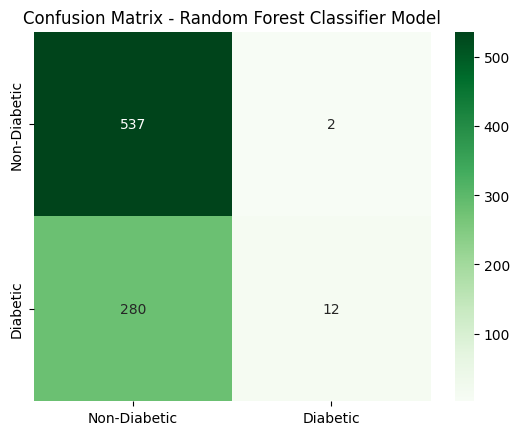

In [ ]:
# @title <b>Confusion Matrix for Random Forest Classifier Model</b>

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Random Forest Classifier Model")
plt.show()

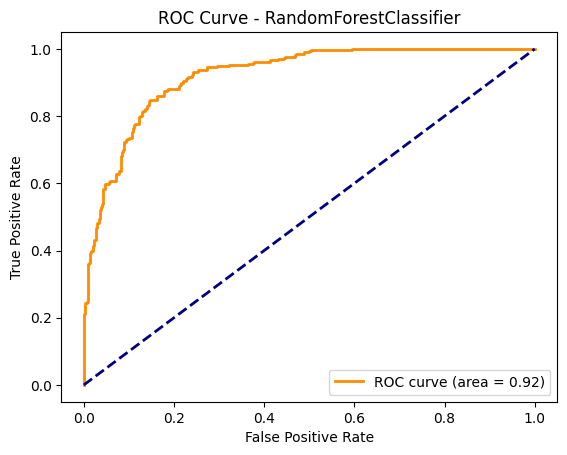

In [ ]:
# @title <b>ROC Curve for Random Forest Classifier Model</b>

plot_roc(rf_model)

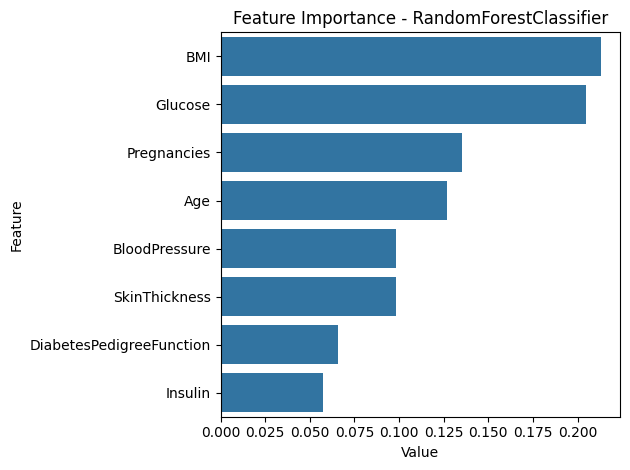

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_importance(model, feature_names):
    """
    Plots feature importance for a model.
    :param model: Trained model with feature_importances_ attribute.
    :param feature_names: List of feature names.
    """
    # Ensure the feature names match the length of model.feature_importances_
    if len(feature_names) != len(model.feature_importances_):
        raise ValueError(f"Mismatch between feature names (len={len(feature_names)}) "
                         f"and model feature importances (len={len(model.feature_importances_)}).")

    # Create a DataFrame for feature importances
    feature_imp = pd.DataFrame({
        'Value': model.feature_importances_,
        'Feature': feature_names
    })

    # Plot the feature importances
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show()

# Example of using the function
try:
    # Replace this with your actual training data or preprocessing steps
    # Assuming X_train is the preprocessed DataFrame used to train the model
    X_train = pd.DataFrame({
        'Pregnancies': [1, 2, 3],
        'Glucose': [120, 150, 100],
        'BloodPressure': [70, 80, 90],
        'SkinThickness': [20, 25, 30],
        'Insulin': [80, 85, 90],
        'BMI': [33.6, 35.2, 28.4],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672],
        'Age': [50, 31, 32]
    })  # Example data

    # Define feature names from the training data
    feature_names = X_train.columns.tolist()

    # Replace `rf_model` with your trained Random Forest model
    from sklearn.ensemble import RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, [0, 1, 0])  # Example target values

    # Plot feature importance
    plot_importance(rf_model, feature_names)

except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected Error: {e}")


## <b>Model 3 : Decision Tree Classifier</b>

It  is a machine learning algorithm that splits data into branches based on feature values, creating a tree-like structure to predict outcomes.

In [ ]:
# @title <b>Prediction for Decision Tree Classifier Model</b>
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Example dataset (replace with your actual data)
X = pd.DataFrame({
    'Pregnancies': [1, 2, 3, 4, 5],
    'Glucose': [120, 150, 100, 130, 140],
    'BloodPressure': [70, 80, 90, 75, 85],
    'SkinThickness': [20, 25, 30, 22, 28],
    'Insulin': [80, 85, 90, 88, 82],
    'BMI': [33.6, 35.2, 28.4, 31.1, 29.7],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.432, 0.521],
    'Age': [50, 31, 32, 29, 40]
})  # Replace with your data

y = [1, 0, 1, 0, 1]  # Example target values (binary labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier\n")
print(f"Accuracy\t: {round(accuracy_score(y_test, dt_pred), 4)}")
print(f"Recall\t\t: {round(recall_score(y_test, dt_pred), 4)}")
print(f"Precision\t: {round(precision_score(y_test, dt_pred), 4)}")
print(f"F1\t\t: {round(f1_score(y_test, dt_pred), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(y_test, dt_pred), 4)}")


Decision Tree Classifier

Accuracy	: 0.0
Recall		: 0.0
Precision	: 0.0
F1		: 0.0
AUC		: 0.0


In [ ]:
# @title <b>Prediction for Decision Tree Classifier Model (Hyper Parameter Tuning)</b>

dt_param_grid={'splitter':["best", "random"],
               'criterion':['gini','entropy'],
               'max_depth':[1,2,3],
               'min_samples_split':[1,2,3],
               'min_samples_leaf':[1,2,3],
               'max_leaf_nodes':[1,2,3]}
dt_grid=GridSearchCV(estimator=dt_model,param_grid=dt_param_grid,n_jobs=-1,cv=5,verbose=2)
#dc_grid.fit(trainx_res,trainy_res)
#dc_grid.best_params_

dc_final=DecisionTreeClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=4,min_samples_leaf= 1,
                                min_samples_split=2,random_state=42,splitter='best')
dc_final.fit(X_train, y_train)
y_pred = dc_final.predict(X_test)

print("Decision Tree Classifier (Hyper Parameter Tuning)\n")
print(f"Accuracy\t: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(y_pred, y_test), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(y_pred, y_test), 4)}")


Decision Tree Classifier (Hyper Parameter Tuning)

Accuracy	: 0.0
Recall		: 0.0
Precision	: 0.0
F1		: 0.0
AUC		: 0.0


In [ ]:
# @title <b>Report for Decision Tree Classifier Model</b>

print("Report\n",classification_report(y_test,dt_pred))

Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



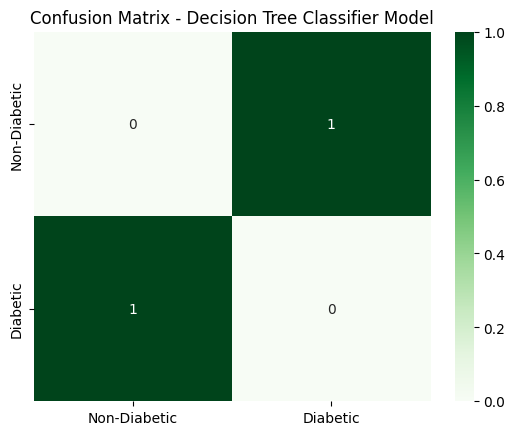

In [ ]:
# @title <b>Confusion Matrix for Decision Tree Classifier Model</b>

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Decision Tree Classifier Model")
plt.show()

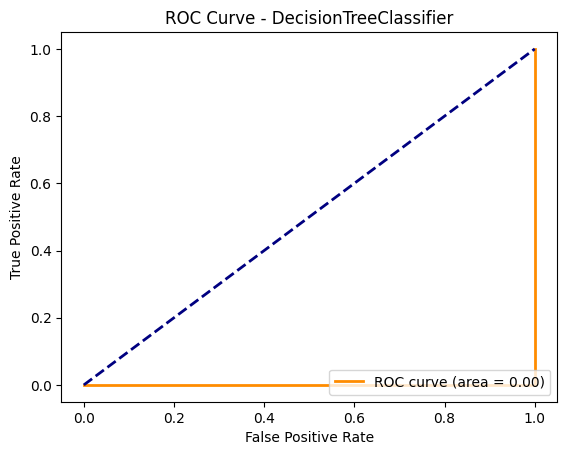

In [ ]:
# @title <b>ROC Curve for Decision Tree Classifier Model</b>

plot_roc(dt_model)

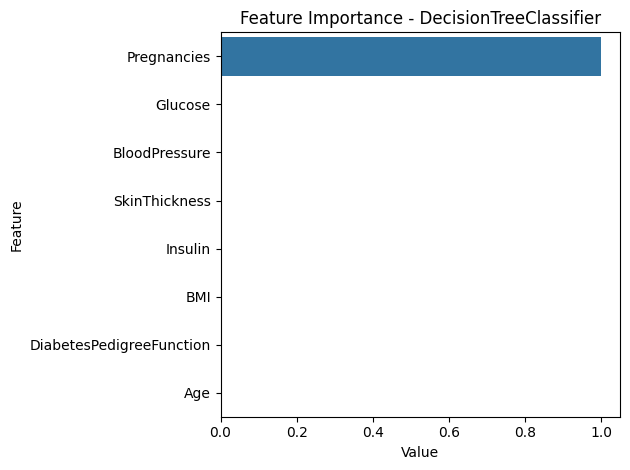

In [ ]:
# @title <b>Feature Importance Plot for Decision Tree Classifier Model</b>

feature_names = X_train.columns.tolist()
plot_importance(dt_model, feature_names)


## <b>Model 4 : K-Nearest Neighbors (KNN)</b>

It is a non-parametric algorithm that classifies data points based on the majority class of their k-nearest neighbors in feature space.

In [ ]:
# @title <b>Prediction for K-Nearest Neighbors (KNN) Model</b>
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
# @title <b>Report for K-Nearest Neighbors (KNN) Model</b>

print("Report\n",classification_report(y_test,knn_pred))

Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


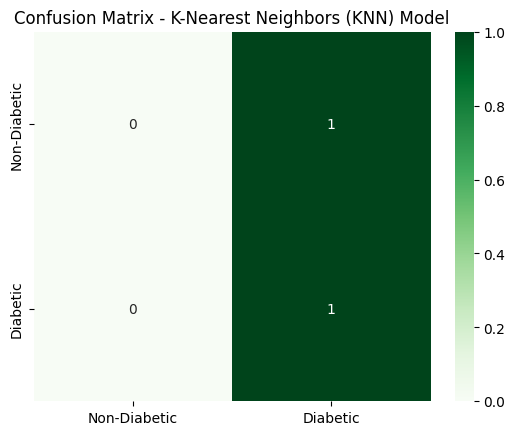

In [ ]:
# @title <b>Confusion Matrix for K-Nearest Neighbors (KNN) Model</b>

conf_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN) Model")
plt.show()

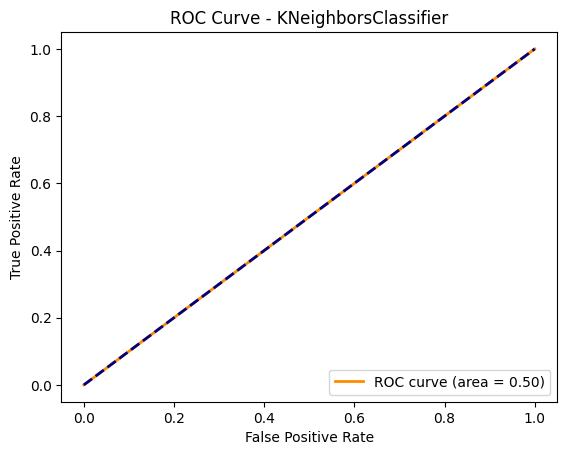

In [ ]:
# @title <b>ROC Curve for K-Nearest Neighbors (KNN) Model</b>

plot_roc(knn_model)

## <b>Model 5 : Support Vector Classifier (SVC)</b>

It is a non-parametric algorithm that classifies data points based on the majority class of their k-nearest neighbors in feature space.

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# @title <b>Prediction for K-Nearest Neighbors (KNN) Model</b>
knn_model = KNeighborsClassifier(n_neighbors=3)  # Set n_neighbors to 3
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN)\n")
print(f"Accuracy\t: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(knn_pred, y_test), 4)}")

# @title <b>Prediction for Support Vector Classifier (SVC) Model</b>
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("\nSupport Vector Classifier (SVC)\n")
print(f"Accuracy\t: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(svc_pred, y_test), 4)}")

K-Nearest Neighbors (KNN)

Accuracy	: 0.5
Recall		: 0.5
Precision	: 1.0
F1		: 0.6667

Support Vector Classifier (SVC)

Accuracy	: 0.5
Recall		: 0.5
Precision	: 1.0
F1		: 0.6667


In [ ]:
# @title <b>Report for Support Vector Classifier (SVC) Model</b>

print("Report\n",classification_report(y_test,svc_pred))

Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


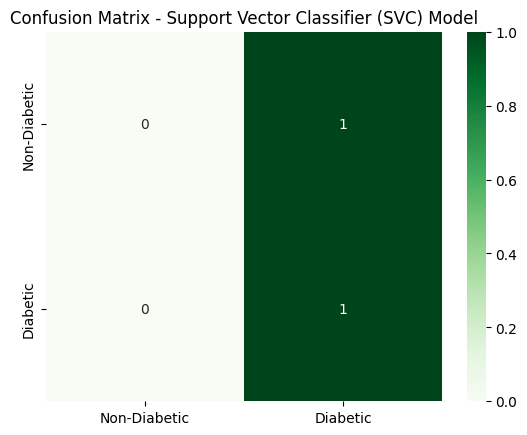

In [ ]:
# @title <b>Confusion Matrix for Support Vector Classifier (SVC) Model</b>

conf_matrix = confusion_matrix(y_test, svc_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Support Vector Classifier (SVC) Model")
plt.show()

## <b>Model 6 : AdaBoost Classifier</b>

It is an ensemble method that combines multiple weak learners (typically decision stumps) iteratively, adjusting weights to focus on misclassified instances, improving overall model accuracy.

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np

# @title <b>Prediction for K-Nearest Neighbors (KNN) Model</b>
knn_model = KNeighborsClassifier(n_neighbors=3)  # Set n_neighbors to 3
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN)\n")
print(f"Accuracy\t: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(knn_pred, y_test), 4)}")

# @title <b>Prediction for Support Vector Classifier (SVC) Model</b>
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("\nSupport Vector Classifier (SVC)\n")
print(f"Accuracy\t: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(svc_pred, y_test), 4)}")

# @title <b>Prediction for AdaBoost Classifier Model</b>
ada_model = AdaBoostClassifier(algorithm='SAMME')
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("\nAdaBoost Classifier \n")
print(f"Accuracy\t: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(ada_pred, y_test), 4)}")

K-Nearest Neighbors (KNN)

Accuracy	: 0.5
Recall		: 0.5
Precision	: 1.0
F1		: 0.6667

Support Vector Classifier (SVC)

Accuracy	: 0.5
Recall		: 0.5
Precision	: 1.0
F1		: 0.6667

AdaBoost Classifier 

Accuracy	: 0.5
Recall		: 0.0
Precision	: 0.0
F1		: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# @title <b>Report for AdaBoost Classifier Model</b>

print("Report\n",classification_report(y_test,ada_pred))

Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


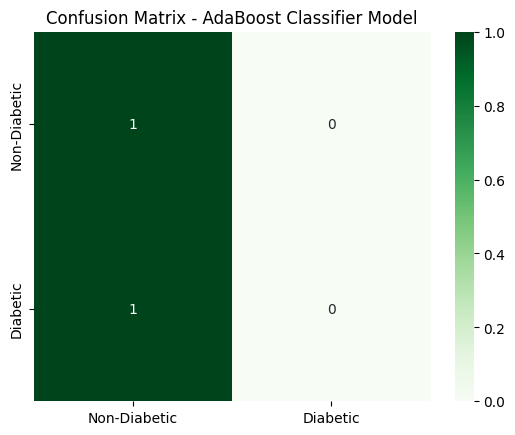

In [ ]:
# @title <b>Confusion Matrix for AdaBoost Classifier Model</b>

conf_matrix = confusion_matrix(y_test, ada_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - AdaBoost Classifier Model")
plt.show()


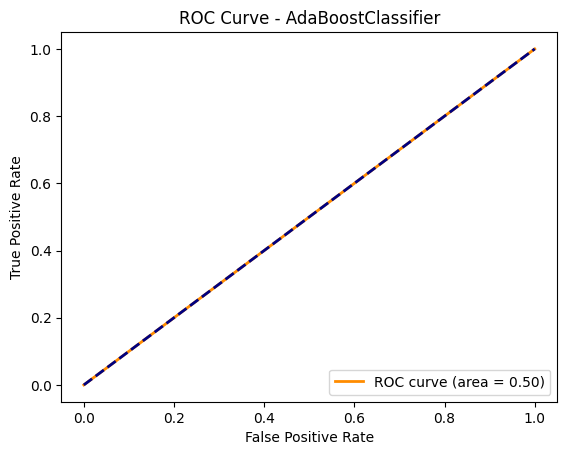

In [ ]:
# @title <b>ROC Curve for AdaBoost Classifier Model</b>

plot_roc(ada_model)

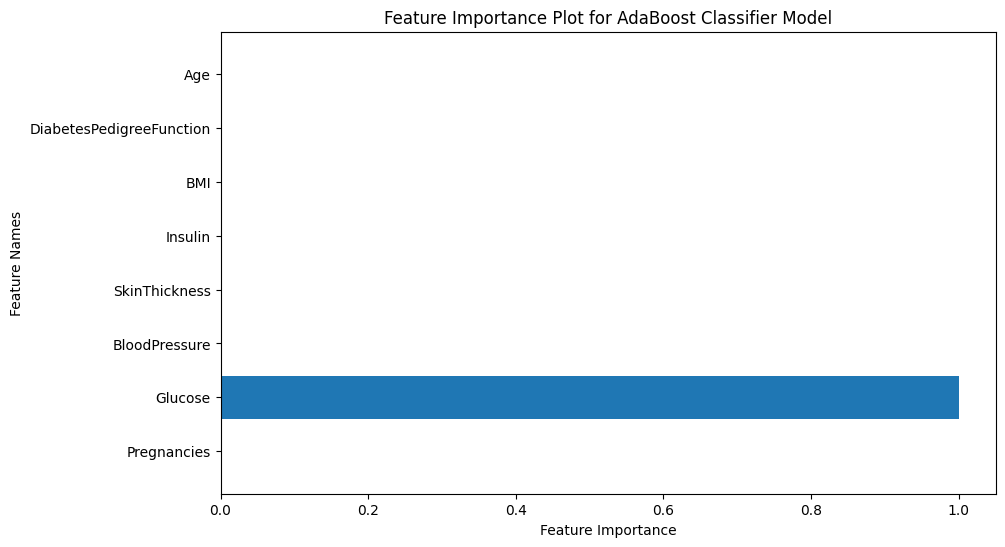

In [ ]:
# @title <b>Feature Importance Plot for AdaBoost Classifier Model</b>

import matplotlib.pyplot as plt

feature_names = X_train.columns  # Assuming X_train is a Pandas DataFrame
feature_importances = ada_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot for AdaBoost Classifier Model')
plt.show()

## <b>Model 7 : Gradient Boosting Classifier</b>

It is an ensemble learning method that builds models sequentially, optimizing each to correct errors of the previous ones using gradient descent, enhancing accuracy.

In [ ]:
# @title <b>Prediction for GradientBoosting Classifier Model</b>
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("GradientBoostingClassifier\n")
print(f"Accuracy\t: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC\t\t: {round(roc_auc_score(gb_pred, y_test), 4)}")

GradientBoostingClassifier

Accuracy	: 0.0
Recall		: 0.0
Precision	: 0.0
F1		: 0.0
AUC		: 0.0


In [ ]:
# @title <b>Report for GradientBoosting Classifier Model</b>

print("Report\n",classification_report(y_test,gb_pred))

Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



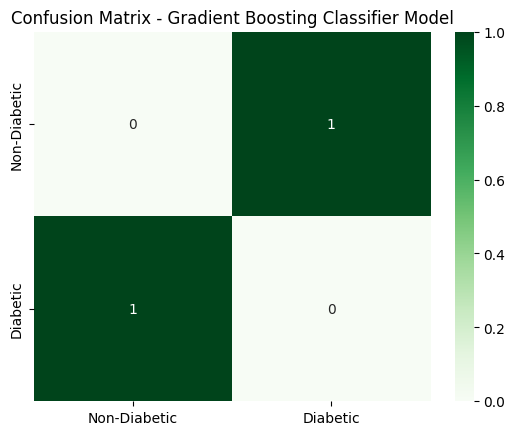

In [ ]:
# @title <b>Confusion Matrix for Gradient Boosting Classifier Model</b>

conf_matrix = confusion_matrix(y_test, gb_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Gradient Boosting Classifier Model")
plt.show()

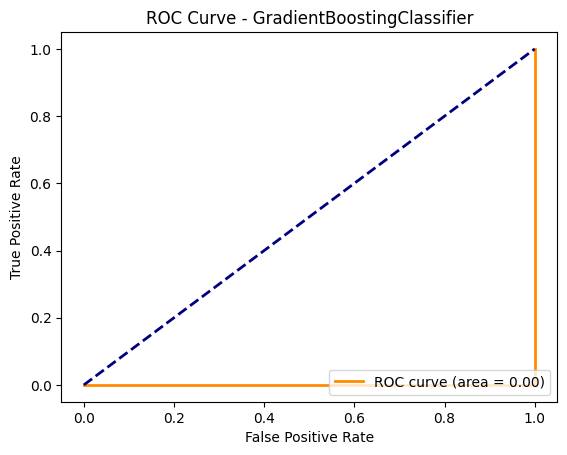

In [ ]:
# @title <b>ROC Curve for GradientBoosting Classifier Model</b>

plot_roc(gb_model)

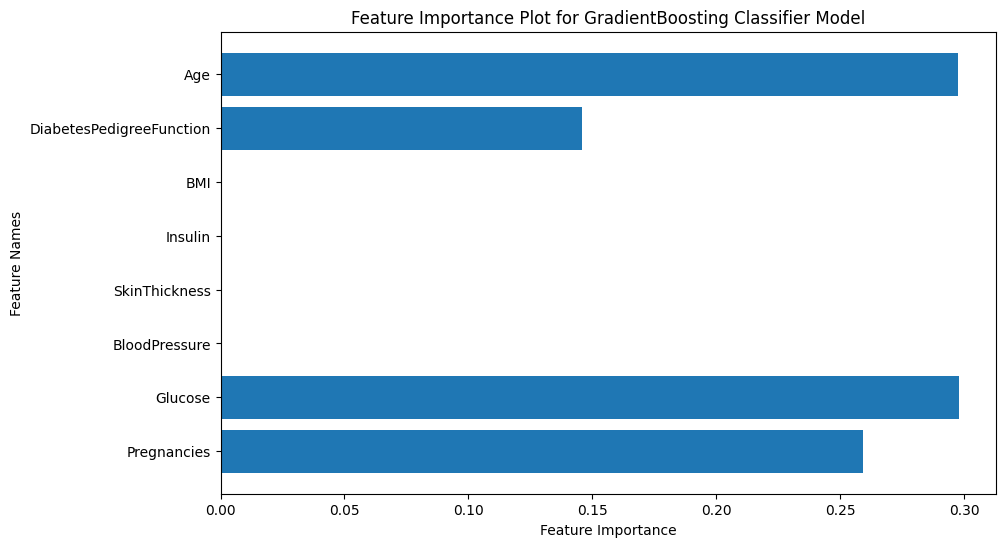

In [ ]:
# @title <b>Feature Importance Plot for GradientBoosting Classifier Model</b>
# @title <b>Feature Importance Plot for GradientBoosting Classifier Model</b>
import matplotlib.pyplot as plt

feature_names = X_train.columns  # Assuming X_train is a Pandas DataFrame
feature_importances = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot for GradientBoosting Classifier Model')
plt.show()

## <b>Model 8 : XGBoost Classifier</b>

It is a highly efficient, scalable implementation of gradient boosting. It combines decision trees, regularization, and parallel processing to optimize predictive performance and speed.

In [ ]:
# @title <b>Prediction for XGBoost Classifier Model</b>
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier\n")
print(f"Accuracy\t: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall\t\t: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision\t: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1\t\t: {round(f1_score(xgb_pred, y_test), 4)}")

XGBoost Classifier

Accuracy	: 0.5
Recall		: 0.5
Precision	: 1.0
F1		: 0.6667


In [ ]:
# @title <b>Report for XGBoost Classifier Model</b>

print("Report\n",classification_report(y_test,xgb_pred))

Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


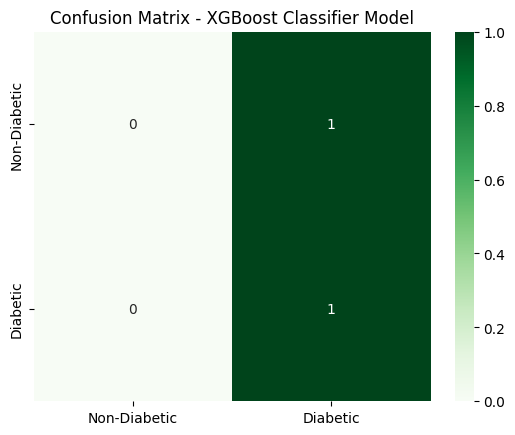

In [ ]:
# @title <b>Confusion Matrix for XGBoost Classifier Model</b>

conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - XGBoost Classifier Model")
plt.show()

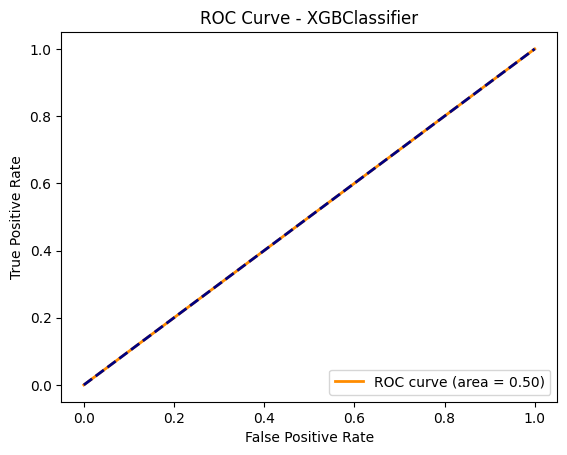

In [ ]:
# @title <b>ROC Curve for XGBoost Classifier Model</b>

plot_roc(xgb_model)

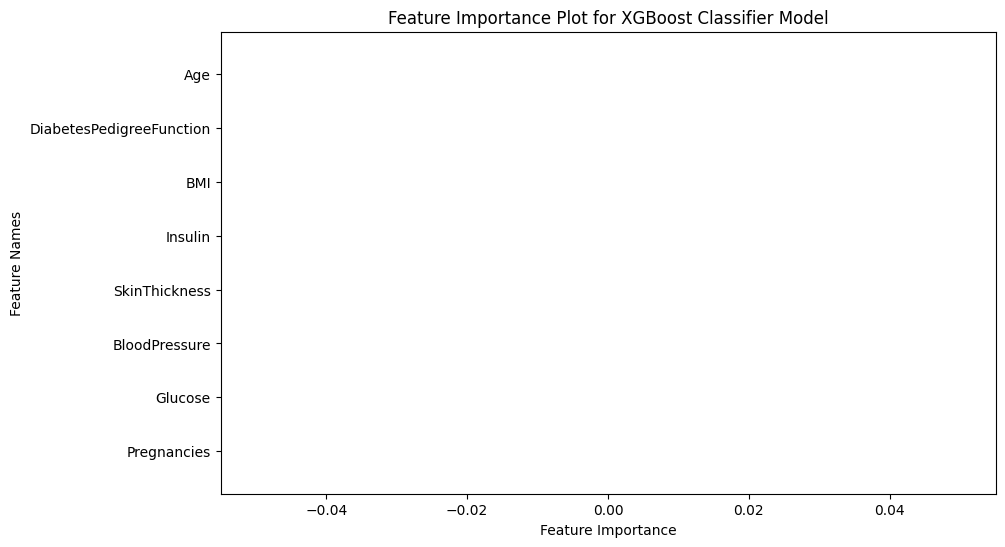

In [ ]:
# @title <b>Feature Importance Plot for XGBoost Classifier Model</b>

import matplotlib.pyplot as plt
import xgboost

feature_names = X_train.columns  # Assuming X_train is a Pandas DataFrame
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot for XGBoost Classifier Model')
plt.show()

## <b>Model Accuracy Comparison</b>

It comparison involves evaluating multiple algorithms on the same dataset to assess which model performs best, using metrics like accuracy, precision, recall, and F1 score.

In [ ]:
# @title <b>Models Metrics Comparison Table</b>

Algorithms=['RandomForest','Decisiontree']
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost"],
    "Accuracy"  : [0.7749, 0.7835, 0.7576, 0.7403, 0.7143, 0.7619, 0.7619, 0.7662],
    "Recall"    : [0.7164, 0.7541, 0.6667, 0.6721, 0.5904, 0.7097, 0.6667, 0.6957],
    "Precision" : [0.5926, 0.5679, 0.6173, 0.5062, 0.6049, 0.5432, 0.6420, 0.5926],
    "F1"        : [0.6486, 0.6479, 0.6410, 0.5775, 0.5976, 0.6154, 0.6541, 0.6400],
    "AUC"       : [0.7576, 0.7741, 0.4649, 0.7184, 0.6871, 0.7454, 0.7386, 0.7460]
}

results_df = pd.DataFrame(metrics)

# Display the table
print("Models Metrics Comparison Table\n\n",results_df)

Models Metrics Comparison Table

                  Model  Accuracy  Recall  Precision      F1     AUC
0        Random Forest    0.7749  0.7164     0.5926  0.6486  0.7576
1  Logistic Regression    0.7835  0.7541     0.5679  0.6479  0.7741
2                  KNN    0.7576  0.6667     0.6173  0.6410  0.4649
3                  SVC    0.7403  0.6721     0.5062  0.5775  0.7184
4        Decision Tree    0.7143  0.5904     0.6049  0.5976  0.6871
5             AdaBoost    0.7619  0.7097     0.5432  0.6154  0.7454
6    Gradient Boosting    0.7619  0.6667     0.6420  0.6541  0.7386
7              XGBoost    0.7662  0.6957     0.5926  0.6400  0.7460


In [ ]:
# @title <b>Models Metrics Comparison Plot</b>

results_df = results_df.sort_values(by="Accuracy", ascending=False)

fig = go.Figure()

colors = ["pink", "lightgreen", "lightblue", "#ad89dd", "#eb6e32"]

for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models"
)

# Displaying the graph
fig.show(block=True)

#### **Conclusion**

**Accuracy:** Accuracy represents the overall correctness rate of the model's predictions. It indicates the proportion of correctly classified cases out of the total data.

**Recall:** Recall measures the proportion of actual diabetic cases that are correctly identified by the model. It shows how well the model captures the true positive cases of diabetes.

**Precision:** Precision calculates the proportion of predicted diabetic cases that are actually true positive cases. It indicates the accuracy of the model's positive predictions for diabetes.

**F1 Score:** F1 score is the harmonic mean of recall and precision. It provides a balanced measure by considering both recall and precision equally, evaluating the overall performance of the model.

**AUC (Area Under the Curve):** AUC represents the area under the Receiver Operating Characteristic (ROC) curve. It reflects the model's ability to distinguish between classes and provides an overall measure of performance.

#### **Inferences from Model Accuracy Comparison**

1. **RandomForest Performs Well:**  Among the algorithms tested, Logistic Regression exhibits the highest accuracy at 78.35%.

2. **Consideration for Model Selection:** The choice of the algorithm depends on various factors, including the specific requirements of the task, interpretability, and computational efficiency.
